<a href="https://colab.research.google.com/github/R1dhoeee/Deeplearning/blob/main/ModelDeeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# 1. Install dan Import library
!pip install gdown

import gdown
import zipfile
import shutil
import random
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras import regularizers


In [20]:
# 2. Download dataset dari Google Drive (gunakan direct link)
file_id = "1Nls_gsE6Nq5hpCBW09o_on8_k924Ityz"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="dataset.zip", quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1Nls_gsE6Nq5hpCBW09o_on8_k924Ityz
From (redirected): https://drive.google.com/uc?id=1Nls_gsE6Nq5hpCBW09o_on8_k924Ityz&confirm=t&uuid=6ad44791-40cd-49ed-96a7-ee45e97e5b4e
To: /content/dataset.zip
100%|██████████| 54.5M/54.5M [00:00<00:00, 172MB/s]


'dataset.zip'

In [21]:
# 3. Ekstrak zip
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [22]:
# 4. Split Data sesuai template kamu
original_dataset_dir = Path("dataset/E:/Foto Resize - Copy")
base_dir = Path("dataset/split_dataset")
train_dir = base_dir / "train"
val_dir = base_dir / "val"
test_dir = base_dir / "test"

# Buat folder split
for folder in [train_dir, val_dir, test_dir]:
    folder.mkdir(parents=True, exist_ok=True)

# Rasio split
val_split = 0.2
test_split = 0.1

# Untuk setiap kelas
for class_dir in original_dataset_dir.iterdir():
    if class_dir.is_dir():
        images = list(class_dir.glob("*"))
        random.shuffle(images)

        class_name = class_dir.name
        total = len(images)
        val_count = int(total * val_split)
        test_count = int(total * test_split)
        train_count = total - val_count - test_count

        train_images = images[:train_count]
        val_images = images[train_count:train_count+val_count]
        test_images = images[train_count+val_count:]

        for subset, subset_images in zip(
            [train_dir, val_dir, test_dir],
            [train_images, val_images, test_images]
        ):
            class_subset_dir = subset / class_name
            class_subset_dir.mkdir(parents=True, exist_ok=True)
            for img in subset_images:
                shutil.copy(img, class_subset_dir)


In [23]:
# 5. Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

img_size = (224, 224)
batch_size = 16

train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_generator = val_test_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_generator = val_test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 1107 images belonging to 4 classes.
Found 437 images belonging to 4 classes.
Found 229 images belonging to 4 classes.


In [36]:
# 6. Bangun Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Tambahan ini
    layers.Dense(train_generator.num_classes, activation='softmax'),

])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [37]:
# 7. Callbacks
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(patience=3, factor=0.5)


In [38]:
# 8. Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 279ms/step - accuracy: 0.4767 - loss: 1.3578 - val_accuracy: 0.8124 - val_loss: 0.4230 - learning_rate: 0.0010
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - accuracy: 0.8287 - loss: 0.4360 - val_accuracy: 0.9108 - val_loss: 0.4187 - learning_rate: 0.0010
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 217ms/step - accuracy: 0.8424 - loss: 0.4416 - val_accuracy: 0.8307 - val_loss: 0.3822 - learning_rate: 0.0010
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 214ms/step - accuracy: 0.8929 - loss: 0.2889 - val_accuracy: 0.8398 - val_loss: 0.4031 - learning_rate: 0.0010
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 226ms/step - accuracy: 0.9097 - loss: 0.2457 - val_accuracy: 0.8947 - val_loss: 0.2435 - learning_rate: 0.0010
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 214ms/step - accuracy: 0.8986 - loss: 0.2789 - val_accuracy: 0.8741 - val_loss: 0.2808 - learning_rate: 0.0010
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 220ms/step - accuracy: 0.9065 - loss: 0.

In [39]:
# 9. Evaluasi
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9801 - loss: 0.0531
Test Accuracy: 98.69%


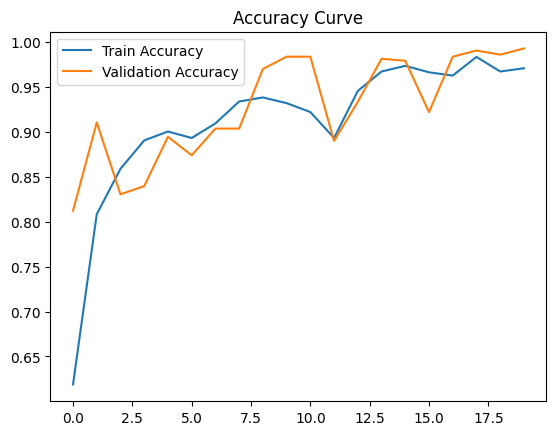

In [40]:
# 10. Visualisasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


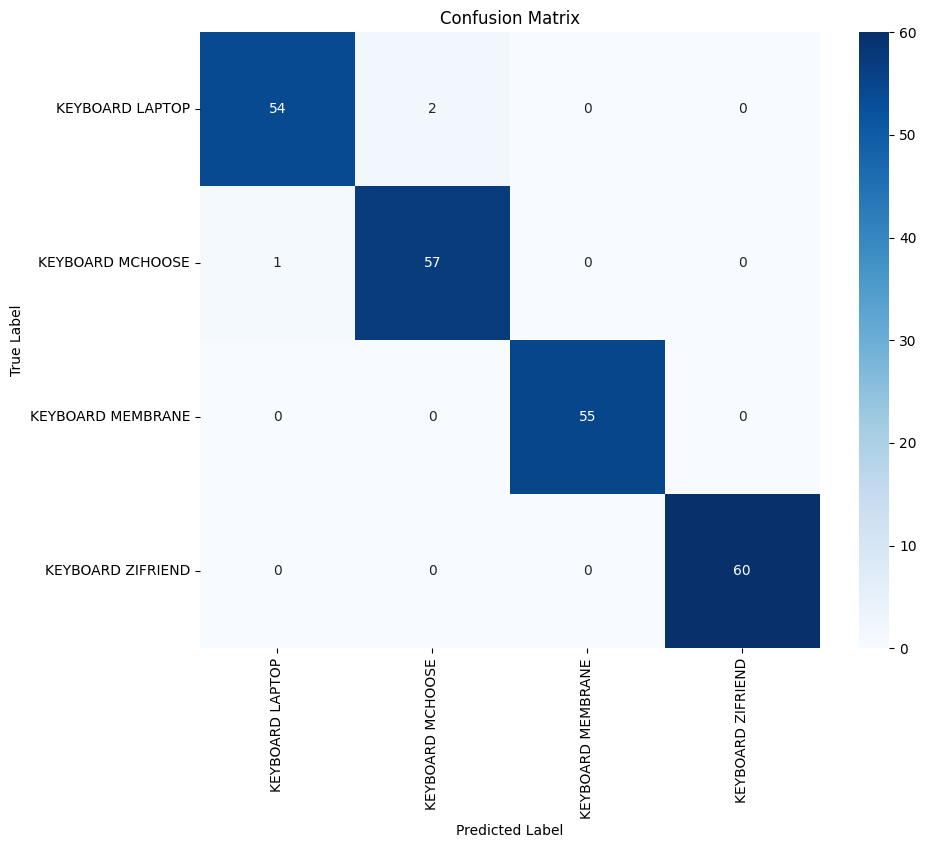


Classification Report:
                   precision    recall  f1-score   support

  KEYBOARD LAPTOP       0.98      0.96      0.97        56
 KEYBOARD MCHOOSE       0.97      0.98      0.97        58
KEYBOARD MEMBRANE       1.00      1.00      1.00        55
KEYBOARD ZIFRIEND       1.00      1.00      1.00        60

         accuracy                           0.99       229
        macro avg       0.99      0.99      0.99       229
     weighted avg       0.99      0.99      0.99       229



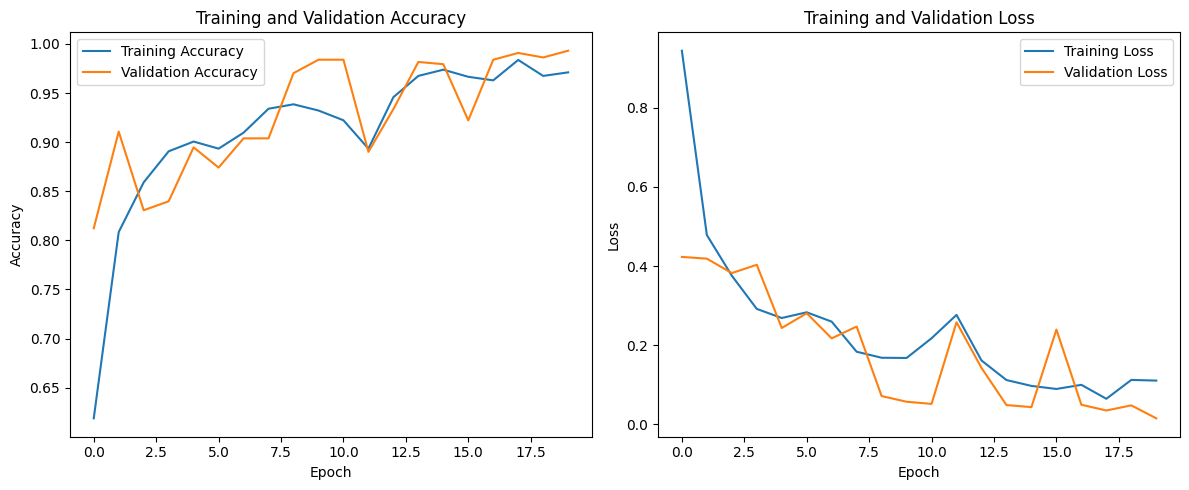

In [41]:
#Evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

#Prediksi pada data test
test_generator.reset()
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

#Dapatkan true classes
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

#Buat confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

#Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#Print classification report
print('\nClassification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

#Grafik akurasi dan loss yang lebih lengkap
plt.figure(figsize=(12, 5))

#Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()